In [105]:
import numpy as np
import pandas as pd
import json

In [106]:
with open('../../config/config.json', 'r') as fh:
    params = json.load(fh)

In [192]:
unemployment_by_year = {}

for year in params['years']:
    shortened_year = str(year)[2:]
    unemployment_by_year[year] = pd.read_csv(f'../../src/data/raw/acs_data/unemployment_data/unemployment_{year}.csv', skiprows=1)

In [196]:
def reformat_zip(x):
    return x[6:11]

def process_unemployment_data(data, year, params):
    unemployment_rate_cols = ['Percent!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Unemployed',
                              'Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed',
                              'Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed']
    for col in unemployment_rate_cols:
        try:
            data = data[['Geographic Area Name', col]]
            break
        except:
            continue
    
    data = data.rename(columns={'Geographic Area Name': 'zip',
                                'Percent!!EMPLOYMENT STATUS!!In labor force!!Civilian labor force!!Unemployed': 'pct_unemployment',
                                'Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed': 'pct_unemployment',
                                'Percent Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed': 'pct_unemployment'})
    
    data['zip'] = data['zip'].apply(reformat_zip).astype('int64')
    data['year'] = year
    data = data[data['zip'].apply(lambda x: x in params['zip_codes'])]
    return data

In [214]:
process_unemployment_data(unemployment_by_year[2020], 2012, params)['pct_unemployment'].apply(lambda x: 0 if x == '-' else x).astype('float').mean()

3.267289719626168

In [216]:
for year in unemployment_by_year:
    print(year, process_unemployment_data(unemployment_by_year[year], 2012, params)['pct_unemployment'].apply(lambda x: 0 if x == '-' else x).astype('float').mean())

2012 5.209345794392523
2013 5.339252336448598
2014 5.247663551401869
2015 4.8336448598130834
2016 4.425233644859813
2017 3.8775700934579445
2018 3.525233644859813
2019 3.34766355140187
2020 3.267289719626168
2021 3.435398230088496


<Axes: xlabel='year'>

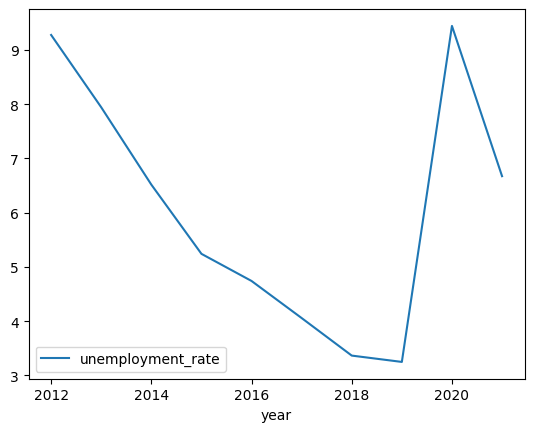

In [221]:
file_path = '../../src/data/raw/employment_data/employment.csv'
employment_rate = pd.read_csv(file_path)

# Only get the year
employment_rate['year'] = pd.to_datetime(employment_rate['DATE']).dt.year

employment_rate = employment_rate.drop(columns=['DATE','CASAND5URN_20240104'])

employment_rate.rename(columns={'CASAND5URN_20231130': 'unemployment_rate'}, inplace=True)

unemployment_by_year = employment_rate.groupby('year')['unemployment_rate'].mean().reset_index()

unemployment_by_year.plot(x='year', y='unemployment_rate', kind='line')